In [ ]:
# Setting Global Options
%pylab inline

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from IPython.display import Image
Image('https://assets.toptal.io/uploads/blog/image/443/toptal-blog-image-1407508081138.png')

# What is Machine Learning?

There are many definitions, all of which describe a core aspect of ML.

1. Machine learning is to be able to write programs with data without explicitly writing it.

2. Machine learning is the process to automatically extract knowledge from data, usually with the goal of making predictions on new, unseen data. 

3. Machine Learning is about coding programs that automatically adjust (or *tune*) their performance from exposure to information (*learning*) encoded in data. 
    - This learning is achieved via **tunable parameters** that are automatically adjusted according to performance criteria.

Machine Learning can be considered a subfield of Artificial Intelligence (AI).



---
### Motivating Example

#### Problem Statement
You are given a task: build an Human Resources classifier; we want to be able to classify company news into human resources or not.
    
#### What do you do? 

- Let's look at the job titles in the news. It may not say if it is human resources event, but the news that has job titles in the news is more probable to be human resources news.
- If there are company names, that is also a good signal. 
- We could look at the verbs and other noun forms(hiring, resignation, letting go, laying off) to say that is actually an HR article.
- We combine all these rules.
- Then, we use some heuristics to determine a threshold to "classify" the news article whether it is an HR or not.

#### Disadvantages
- Rule and heuristic based. If we want to _improve_ the classifier, we introduce more rules.
- The rules are highly dependent on the developer. Biases and prejudices on the articles that you read will be the main driver.
- For a more complicated classification problem, you may not cover all of the rules.
- For a domain that you do not know much about, you need to first learn the domain, the article structure and what you need to use to build the rules.(this is true for machine learning but a lesser extent).


#### *Method 1 - Handcrafted Business Rules*

In [ ]:
company_names = ['Google', 'Microsoft', 'Apple']
job_titles = ['CFO', 'CEO', 'CTO']

In [ ]:
def hr_or_not(text):
    SOME_THRESHOLD = 20
    confidence = 0
    
    ### HR article keywords
    if 'hire' in text or 'hiring' in text or 'join' in text or 'joining' in text or 'laying off' in text or 'resign' in text:   
        confidence += 10

    # Job titles are definitely good again, HR articles generally say the position of the new hire
    for job_title in job_titles:
        if job_title in text:
            confidence += 10

    # If we have company name, that is a good sign as article could be in business domain
    for company_name in company_names:
        if company_name in text:
            confidence += 10

    label = 0
    if confidence >= SOME_THRESHOLD:
        label = 1 # It is an hr article
        
    if (label == 1):
        print('-- {} -- is an HR article'.format(text)) 
    else: 
        print('-- {} -- is not an HR article'.format(text))    
                
    return None

In [ ]:
text = 'Microsoft recently hired such and such person AS CFO'

hr_or_not(text)

In [ ]:
hr_or_not('Bomb set off in a remote mountain location')
hr_or_not('Google renames itself as Alphabet, hires new CEO')
hr_or_not('Apple sees massive laying off')

#### *Method 2 - With Data*

In [ ]:
# Given trained classifier, vectorizer and feature selection method
# This is how one may classify an article in Scikit-learn
# (assuming the classifier is also trained on labeled data)

## Convert into a vector
count = vectorizer.transform(np.asarray(text).toarray())

## Do feature selection
selected_feats = feat_selector.transform(count)

## Algorithm to classify
pred_class = clf.predict(selected_feats)

if label == 1:
    print('-- {} -- is an HR article'.format(text))
else:
    print('-- {} -- is not an HR article'.format(text))

---
## Fundamental ML Concepts

---
#### 1. AUTOMATED PARAMETER LEARNING

- Central to machine learning is the concept of **making decision automatically** from data, **without the user specifying explicit rules** how this decision should be made.  

---
#### 2. GENERALIZATION

- The second central concept is **generalization**. The goal of a machine learning algorithm is to predict on new, previously unseen data. We need to learn small amount of data and induce from it; generalize over much larger datasets by using that knowledge. 
- Typically, we need to make a trade-off between the flexibility and accuracy of the model (_the bias-variance tradeoff_).


#### Advantages of Generalization  

- No rules, no heuristic.
- Provides an evaluation mechanism and based on the classifier, probability of the classifier for a given class. You could have confidence levels based on probability of classifier.(if you still need it).
- As long as you have a representative training data, you would have a much more comprehensive classifier.
- In order to improve the classifier, you need more data. This scales very well. 
- If you want to still incorporate heuristics and rules, you could still have the option. Actually, if you want to improve on precision or recall, some heuristics may come handy in order to prevent false positives and/or false negatives.

---
### The Three major classes of ML:

**Supervised learning**
: Algorithms which learn from a training set of *labeled* examples (exemplars) to generalize to the set of all possible inputs. Examples of supervised learning include regression and classification

**Unsupervised learning**
: Algorithms which learn from a training set of *unlableled* examples, using the features of the inputs to categorize inputs together according to some statistical criteria. Examples of unsupervised learning include k-means clustering and kernel density estimation.

**Reinforcement learning**
: Algorithms that learn via reinforcement from a *critic* that provides information on the quality of a solution, but not on how to improve it. Improved solutions are achieved by iteratively exploring the solution space. 
- We will not cover RL in this course.


---
## Supervised Learning: Classification and Regression

In **Supervised Learning**, we have a dataset consisting of both input features and a desired output. The task is to construct a model (or program) which is able to predict the desired output of an unseen object given the set of features. 

Supervised learning is further broken down into two categories, **classification** and **regression**. 

- In _classification_, the label is **discrete**
- In _regression_, the label is **continuous**

Though, from one point of view, the fact that continuous labels can be binned into categorical variables, one might argue that these tasks are interchangable.
And they are.

Another important thing to remember is that in supervised learning, there is always a distinction between 

- a **training set** for which the desired outcome is given, and 
- a **test set** for which the desired outcome needs to be inferred.

#### Examples/Applications of Supervised Learning

- given a multicolor image of an object through a telescope, determine whether that object is a star, a quasar, or a galaxy. (classification)
- given a photograph of a person, identify the person in the photo. (classification)
- given a list of movies a person has watched and their personal rating of the movie, recommend a list of movies they would like. (recommendation)
- given a persons age, education and position, infer their salary (regression)

---

## Unsupervised Learning: Clustering and friends

In **Unsupervised Learning** there is no desired output associated with the data. Instead, we are interested in extracting some form of knowledge or discover some sort of structure in the data.

> In a sense, you can think of unsupervised learning as a means of _discovering labels from the data_ itself. 

Unsupervised learning comprises tasks such as 
- *dimensionality reduction*, 
- *clustering*, and
- *density estimation*.

####  Examples/Applications of Unsupervised Learning

- given detailed observations of distant galaxies, determine which features or combinations of features summarize best the information.
- given a mixture of two sound sources (for example, a person talking over some music), separate the two
- given a large collection of news articles, find recurring topics inside these articles.
- given a collection of images, cluster similar images together (for example to group them when visualizing a collection)



---
## Training and Test Data

Real world systems learn from the data they have (historical), and as other data comes in (from customers, sensors, or other sources) the classifier that was trained must predict on fundamentally **new** data. 

We can **simulate** this phenomenon during training using a train/test split.

> The test data is a simulation of "future data" which will come into the system during production.

Data might sometimes be sorted, so simple splitting would lead us to has misrepresented proportions of classes in our splits. To get an accurate simulation of the real world, we shuffle our data then split it.

scikit-learn has a prebuilt function, `train_test_split()` to split data into training and testing for you. It works on the following syntax:
    
    from sklearn.cross_validation import train_test_split
    train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.7)
    
By evaluating our model's performance on data that has been seen during training, we could get *false confidence* in the power of our system. This might lead to putting a system into production which fails at predicting new data!

> As a rule of thumb, always evalute/report model performance on out-of-sample data.

Read: [Overfitting](http://www.wikiwand.com/en/Overfitting)

---
### The Student-Professor Analogy

As an interesting analogy, consider the simple case of students appearing for an exam. You, the professor, have taught them their curriculum well and helped them solve many exercises in-class. Now, you hope that these students will be able to take that knowledge and apply it to problems they've never seen before. 

If you quiz them on the same questions they've solved before, their performance will be very good. But only when they solve unseen problems accurately, can you safely conclude that they've learned their subject well. For this reason, you need to train them on a set of problems separate and distinct from the ones you will test them on.

---

## CRISP - DM

[Wikipedia](https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/800px-CRISP-DM_Process_Diagram.png", height=500px, width=500px)>

---

In [ ]:
from IPython.display import Image
Image('http://scikit-learn.org/stable/_static/ml_map.png')

## Machine Learning in Python with `scikit-learn`

ML is about building models with **tunable parameters** that are adjusted automatically so as to improve their behavior by **adapting to training data.**

### `scikit-learn` basics

* Most machine learning algorithms implemented in scikit-learn expect data to be stored in a **two-dimensional array or matrix**. 

* Scikit-learn strives to have a **uniform interface** across all methods  

* The size of the array is expected to be `[n_samples, n_features]`
    - **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
    - **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases



** NOTE **:

> There are some problems with very high dimensionality (hundreds of features) with most of them being zeros (**sparse matrix**). This is a case where `scipy.sparse` matrices can be useful as much more memory-efficient than numpy arrays.



---
# `scikit-learn` interface

All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces:
- **estimator** interface for building and ﬁtting models, is at the core of the library. It,
    - deﬁnes instantiation mechanisms of objects and exposes a **.fit()** method for learning a model from training data. 
    - All supervised and unsupervised **learning algorithms** (e.g., for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. 
    - Machine learning tasks like **feature extraction, feature selection or dimensionality reduction** are also provided as estimators.
- **predictor** interface for making predictions
- **transformer** interface for converting data.





---
## Classes and Functions within `scikit-learn`

- Datasets for prototyping or learning
    - **`sklearn.datasets`**: Datasets


- Tools for structuring/streamlining your analysis
    - **`sklearn.pipeline`**: Pipeline


- Data Preparation for Machine Learning
    - **`sklearn.preprocessing`**: Preprocessing and Normalization
    - **`sklearn.feature_selection`**: Feature Selection
    - **`sklearn.feature_extraction`**: Feature Extraction


- ML Algorithms (selected list)
    - **`sklearn.cluster`**: Clustering
    - **`sklearn.linear_model`**: Generalized Linear Models
    - **`sklearn.multiclass`**: Multiclass classification
    - **`sklearn.svm`**: Support Vector Machines
    - **`sklearn.tree`**: Decision Trees
    - **`sklearn.naive_bayes`**: Naive Bayes
    - **`sklearn.neighbors`**: Nearest Neighbors
    - **`sklearn.neural_network`**: Neural network models


- Model Ensembling 
    - **`sklearn.ensemble`**: Ensemble Methods


- Performance Evaluation
    - **`sklearn.cross_validation`**: Cross Validation
    - **`sklearn.metrics`**: Metrics

----
## Datasets availabe with `scikit-learn`

* **Downloadable Data:** larger datasets available for download, `scikit-learn` includes tools which streamline this process.
    * ``sklearn.datasets.fetch_*``
    
    
* **Generated Data:** there are several datasets which are generated from models based on a random seed.  These are available in 
    * ``sklearn.datasets.make_*``

#### Example: Create a 2-class 2-dimension toy dataset

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=0)
print(X.shape)
print(y.shape)
print(X[:5, :])
print(y[:5])

In [ ]:
my_df = pd.concat([DataFrame(X), Series(y)], axis=1)
my_df.columns = ['x1', 'x2', 'y']
my_df.y = my_df.y.astype('object')
my_df.dtypes

In [ ]:
my_df.plot.scatter(x='x1', y='x2', c='y')

---
* **Packaged Data:** small datasets packaged with `scikit-learn`, can be downloaded using 
    * ``sklearn.datasets.load_*``

#### Example: `iris` data

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

print '\n The object "iris" here is of type:', type(iris)
# iris here is a bunch object.

print '\n Keys of the bunch:', iris.keys()

In [ ]:
print '\n Access data using the key as a method:\n', iris.data[:10]

In [ ]:
iris.data.shape

In [ ]:
iris.feature_names

In [ ]:
print '\n Here are the dependent variable levels:\n', iris.target_names

In [ ]:
print '\n Here is the dependent variable:\n', iris.target

---
# Exercise .... 

Load the Boston Data.
Check out the data types, shape, summary

Create a dataframe with the boston data.

In [ ]:
from sklearn.datasets import load_boston
boston_bunch = load_boston()

print boston_bunch['data'].shape

In [ ]:
boston_bunch.keys()

In [ ]:
DataFrame(boston_bunch['data'], columns=boston_bunch['feature_names']).dtypes

In [ ]:
pd.concat([DataFrame(boston_bunch['data'], 
          columns=boston_bunch['feature_names']), Series(boston_bunch['target'], 
                                                         name='Y')], axis=1)[:10]

----

## The `scikit-learn` Estimator API

All models in scikit-learn have a very consistent interface.  We create an estimator object, defining required parameters, and then work with its methods.

### The `estimator` object 

- Every algorithm is exposed in scikit-learn via an `estimator` object. It is **instantiated** with the following syntax:

---
        from sklearn.<est_family> import <estimator>
        est_obj = <estimator>(<parameters>)
        
---

- All the **parameters** of an estimator **are set** when it is instantiated. (suitable defaults are set already.)

        print(est_obj)

- When the estimator is fit to the data, **parameters are estimated** from the data at hand. 
 
        est_obj.fit(training data, training labels, parameters)


- All the estimated parameters are attributes of the estimator object. An underscore at the end indicates a fit parameter

        print(est_obj.coef_)
        print(est_obj.intercept_)

In [ ]:
from sklearn.linear_model import Lasso
lasso_0 = Lasso()
lasso_1 = Lasso(alpha = 0.9, tol = 0.001)

In [ ]:
print lasso_0, '\n'
print lasso_1

In [ ]:
lasso_1.get_params?

### `estimator` object _methods_

- Available in **all Estimators**
    - **`model.fit()`** : fit training data. 
        - For **supervised** learning applications, this accepts **two arguments**: the data `X` and the labels `y` 
            - e.g. `model.fit(X_train, y_train)`
        - For **unsupervised** learning applications, this accepts only a **single argument**,
    the data `X` 
            - e.g. `model.fit(X_train)`


- Available in **supervised estimators**
  + **`model.predict()`** : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_test)`),
    and returns the learned label for each object in the array.
  + **`model.predict_proba()`** : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + **`model.score()`** : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.


- Available in **unsupervised estimators**
  + **`model.predict()`** : predict labels in clustering algorithms.
  + **`model.transform()`** : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + **`model.fit_transform()`** : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.



In [ ]:
from IPython.display import Image
Image('http://scikit-learn.org/stable/_images/plot_classifier_comparison_001.png')

In [ ]:
from IPython.display import Image
Image('http://scikit-learn.org/stable/_images/plot_cluster_comparison_001.png')

----

### Example 1: `k-nearest neighbor`  

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print type(iris)

X, y = iris['data'], iris['target']
# For now, let's fit the model to the entire data (no splitting)

In [ ]:
X.shape

In [ ]:
Series(y).value_counts()

In [ ]:
(DataFrame(iris['data'], columns=iris['feature_names'])
 .join(Series(iris['target'], name='type'))).head()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X)

print X_pca.shape
print pca.explained_variance_ratio_

import seaborn as sns
DataFrame(X_pca, columns=['x', 'y']).plot.scatter(x='x', y='y', c=y, cmap='Spectral');

In [ ]:
KNeighborsClassifier?

In [ ]:
# Create the model object, set the parameters to be evaluated
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Use the estimator's fit() method to estimate parameters (learn the model)
knn.fit(X, y)

In [ ]:
(DataFrame(iris['data'], columns=iris['feature_names'])
 .join(Series(iris['target'], name='type'))
 .groupby('type')
 .mean()
 )


In [ ]:
def predict_iris_type(arr):
    return (knn.predict(np.array(arr).reshape(1, -1)), 
            iris['target_names'][knn.predict(np.array(arr).reshape(1, -1))])

In [ ]:
predict_iris_type([5.1,  3.5,  1.4,  0.2])

In [ ]:
predict_iris_type([5.1,  2.5,  4.4,  1.2])

In [ ]:
predict_iris_type([4.1,  1.5,  3.4,  2.2])

In [ ]:
knn.predict_proba([[3.0, 4.0, 5.2, 2.6], ])

In [ ]:
knn.predict([[3.0, 4.0, 5.2, 2.6], ])

---
## scikit-learn Advantages

- It has a **consistent API** which is **easy to use** while also providing a lot of **evaluation, diagnostic and cross-validation methods** out of the box (sound familiar? Python has batteries-included approach as well). 


- It uses **Scipy data structures under the hood** and fits quite well with the rest of scientific computing in Python with Scipy, Numpy, Pandas and Matplotlib packages. 
    - Therefore, if you want to visualize the performance of your classifiers (say, using a precision-recall graph or Receiver Operating Characteristics (ROC) curve) those could be quickly visualized with help of Matplotlib. Considering how much time is spent on cleaning and structuring the data, this makes it very convenient to use the library as it **tightly integrates to other scientific computing packages.**


- It has also **limited Natural Language Processing feature extraction capabilities** out-of-the-box as well such as bag of words, tfidf, preprocessing (stop-words, custom preprocessing, analyzer). 


- If you want to quickly perform different benchmarks on toy datasets, it has **the datasets module** which provides common and useful datasets. You could also build toy datasets from these datasets for your own purposes to see if your model performs well before applying the model to the real-world dataset. 


- For parameter optimization and tuning, it also provides grid search and randomized parameter search. 

----
### Example 2: `SVM`

- Using the rbf kernel

In [ ]:
from sklearn.svm import SVC 
SVC?

In [ ]:
model_rbf = SVC(kernel="rbf", C=1.0, gamma=1e-4)
model_rbf.fit(X, y)
# y_predicted = model.predict(X_test) 

- Using the poly kernel

In [ ]:
from sklearn.svm import SVC
svc_poly = SVC(kernel='poly', gamma=0.005, C=1.2, degree=6)
svc_poly.fit(X, y)

In [ ]:
def predict_svm(arr, svm_type='rbf'):
    return model_rbf.predict(np.array(arr).reshape(1, -1)) if svm_type == 'rbf' else svc_poly.predict(np.array(arr).reshape(1, -1))

In [ ]:
print predict_svm([5.1,  3.5,  1.4,  0.2]), predict_svm([5.1,  3.5,  1.4,  0.2], svm_type='poly')

In [ ]:
print (predict_svm([6,  3,  4,  1]), 
       predict_svm([6,  3,  4,  1], svm_type='poly'))

In [ ]:
print (predict_svm([5.5,  3,  2.8,  0.8]), 
       predict_svm([5.5,  3,  2.8,  0.8], svm_type='poly'))

----
### Example 3: `LinearRegression`

In [ ]:
%pylab inline

In [ ]:
# Create some sample data
import numpy as np
np.random.seed(0)

X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.scatter(X, y);

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
print lm

In [ ]:
lm.coef_

In [ ]:
lm.intercept_

In [ ]:
# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]

# print X_fit
y_fit = lm.predict(X_fit)

plt.scatter(X, y)

plt.plot(X_fit, y_fit);

---
## Task1 : Run LinearRegression on the Boston Housing Prices Data

---

----
### Example 4: Regression using `randomforest`

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor?

In [ ]:
model = RandomForestRegressor(n_estimators=2)
model.fit(X, y)

In [ ]:
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
Y_fit = model.predict(X_fit)

plt.scatter(X, y)
plt.plot(X_fit, Y_fit);

----
# `Preprocessing and Dimensionality Reduction`

Preprocessing data, Dimensionality reduction, Manifold Learning and Feature Extraction are tools for finding a new representation of the input data without any additional input and while retaining most of the information contained in the original input dataset.

### 1. Preprocessing

Many ML models require the input data to have zero mean and unit variance in order to avoid biasing the estimated parameters towards features with different units. Applying this step in `scikit-learn` has a very similar interface to other supervised learning algorithms. 

Steps involved in this process:

- Import and instantiate the `StandardScaler()` function to create a preprocessing object
- Apply it to the input data using `.fit()` to learn the required parameters for each feature
- Rescale your data by applying the `.transform()` (*not* predict) method

Here's an example:

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
print(X.shape), '\n'

print iris.feature_names, '\n'
print("means : %s " % X.mean(axis=0)), '\n'
print("standard deviations : %s " % X.std(axis=0)), '\n'

In [ ]:
# Import scaler and instantiate
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler?

In [ ]:
scaler.fit?

In [ ]:
print X[:5]

In [ ]:
# Learn the parameters for rescaling
scaler.fit(X)

In [ ]:
# Apply it to the data
X_scaled = scaler.transform(X)

# Check the output
print(X_scaled.shape)
print("mean : %s " % X_scaled.mean(axis=0))
print("standard deviation : %s " % X_scaled.std(axis=0))

In [ ]:
print X_scaled.round(2)[:5]

TASK 1:
    
Scale and Center the Boston Dataset and check the means and stddevs

# LabelEncoder

# OneHotEncoder

---
### 2. Dimensionality Reduction using PCA

PCA is a technique to reduce the number of features in our data by finding new _components_ to represent the data. These components are typically 

- a linear combination of the old data; and 
- designed to _iteratively_ capture the majority of the total variance explained by the full dataset.

PCA is a very handy technique for visualizing higher-dimensional data in 2- or 3-dimensions, which are intuitively interpretable.

Here's an **example**:

We know that the `iris` dataset has four dimensions. To visualize this data, we can bring it down to two dimensions that capture most of the variance - 

In [ ]:
X, y = iris.data, iris.target

# Import and instantiate
from sklearn.decomposition import PCA

In [ ]:
PCA?

In [ ]:
pca_2 = PCA(n_components=2)

In [ ]:
# Fit
pca_2.fit(X)

# Apply to the data
X_reduced = pca_2.transform(X)

print("Reduced dataset shape:", X_reduced.shape)

In [ ]:
pca_2.explained_variance_ratio_

In [ ]:
import pylab as pl
%matplotlib inline
pl.scatter(X_reduced[:, 0],
           X_reduced[:, 1],
           c=y,
           cmap='RdYlBu')

---
## PCA on the Boston Data

In [ ]:
from sklearn.datasets import load_boston
X = load_boston().data
print X.shape

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

In [ ]:
# Perform PCA
pca_boston = PCA(n_components=2)
pca_boston.fit(X_scaled)

In [ ]:
pca_boston.explained_variance_ratio_

In [ ]:
df = pd.DataFrame(data=pca_boston.transform(X_scaled),
               columns=['PC_1', 'PC_2'])

In [ ]:
df.plot.scatter(x='PC_1', y='PC_2')

---
### TASK 2:
    
Find the number of components that would capture >=85% of the explained variance in the Boston Data

Since there are 13 to begin with, it should ideally be a number between 5 and 10.

- Declare a function and use a list comprehension
- Use a for loop and push data into a list/dict in every iteration.
---

In [ ]:
def runPCA(n_comp=5, X_scaled=X_scaled):
    """
    """
    pca_n = PCA(n_comp)
    pca_n.fit(X_scaled)
    return pca_n.explained_variance_ratio_.sum()

In [ ]:
Series({x:runPCA(n_comp=x) for x in range(5, 13)}).plot();

In [ ]:
for i in range(5, 11):
    print i, runPCA(n_comp=i)

$NOTE$
> One **weakness of PCA** is that it _cannot detect non-linear features_.  Manifold Learning* addresses this deficiency.

See [here](http://scikit-learn.org/stable/modules/manifold.html) for more detail

## Example/Task: Standardization and PCA on the Boston Data

In [ ]:
from sklearn.datasets import load_boston
boston_bunch = load_boston()

In [ ]:
import pandas as pd
pd.DataFrame(boston_bunch.data, columns=boston_bunch.feature_names).head()

In [ ]:
# TASK 1:
# 1. Run Preprocessing to standardize the data (You can see that everything is on a different scale)
# 2. Run PCA on the preprocessed data. 
# 3. Visualize it in 2 dimensions.

In [ ]:
X = boston_bunch.data
y = boston_bunch.target
print X.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
scaled_X = scaler.transform(X)

In [ ]:
DataFrame(scaled_X).mean()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
pca.fit(X_scaled)
X_2PCs = pca.transform(X_scaled)

In [ ]:
DataFrame(X_2PCs, columns=['x1', 'x2']).plot.scatter(x='x1', y='x2')

---
## Parameter Selection and Performance Metrics

### The Bias-Variance Tradeoff

Most models have parameters that influence the **complexity** of the model. 

> There is always a trade-off that the modeler must make between model **flexibility** and **interpretability**.

A highly complex model may fit the data well (might lead to _overfitting_) but it would be difficult to interpret. On the other hand, an overly simple model would be easier to understand but then it would not generalize well.

What we would like is a way to quantitatively identify the degree of overfit and underfit, and optimize the hyperparameters (in this case, the polynomial degree d) in order to determine the best algorithm.


In [ ]:
from IPython.display import Image
Image('http://i.stack.imgur.com/zbNLd.png')

---
### How to detect `overfitting`

- Dataset has Xs and Y.
- Split into Train, Test.
- Find `Training Accuracy` (predict using the train set, and you know actual) 
- Find `Test accuracy` 
- IF IT IS VERY LOW YOU MIGHT HAVE OVERFIT

----

<img src="http://image.slidesharecdn.com/petutorial-150413084118-conversion-gate01/95/performance-evaluation-for-classifiers-tutorial-59-638.jpg?cb=1428914518">

---
## Cross Validation

One problem with the 3-part split is that we drastically reduce the number of samples which can be used for learning the model. Our model can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. 

Computationally, the data is split repeatedly into a training and test sets, with a separate model built for every pair. The test-set scores are then aggregated. 

** K-fold Cross Validation **

The most common way to do cross-validation is k-fold cross-validation, in which the data is first split into k (often 5 or 10) equal-sized folds, and then for each iteration, one of the k folds is used as test data, and the rest as training data

** Other CV functions **

The ``sklearn.cross_validation`` module has all functions related to cross validation. There easiest function is ``cross_val_score`` which takes an estimator and a dataset, and will do all of the splitting for you:

    from sklearn.cross_validation import cross_val_score
    scores = cross_val_score(classifier, X, y, cv=5)
    # this implements 5-fold Cross Validation
    print(scores)
    print(np.mean(scores))

Different cross-validation methods available in `scikit-learn` include:

    KFold, StratifiedKFold, ShuffleSplit, LeavePLabelOut
            
By default, `cross_val_score()` will use ``StratifiedKFold`` for classification, which ensures that the **class proportions are preserved** in each fold. 
With standard KFold, labels are ignored.


> If you have a binary classification dataset with 90% of data point belonging to class 0, that would mean that in each fold, 90% of datapoints would belong to class 0. If you would just use KFold cross-validation, it is likely that you would generate a split that only contains class 0.

### Finding the right fit

Unfortunately, **there is no general rule** how to find the sweet spot, and so machine learning practitioners have to find the best trade-off of model-complexity and generalization by **trying several parameter settings.** Typical examples include 

- _C, kernel, gamma_ for Support Vector Classifier, 
- _alpha_ for Lasso, etc.

A simple example for optimizing a single parameter would be testing out different values of `k` in a kNN algorithm.

If multiple parameters are important, we try all possible combinations by constructing a grid and searching through it. For example, in an SVM, both `c` and `gamma` need to be optimized.

> Such parameters (often referred to as _hyperparameters_) provided when constructing an estimator may be optimized. 


### Estimation using `GridSearchCV`

A search consists of:

- an estimator (regressor or classifier such as sklearn.svm.SVC());
- a parameter space;
- a method for searching or sampling candidates;
- a cross-validation scheme; and
- a score function.

There is a built-in class for this functionality in scikit-learn called `GridSearchCV`. 

> The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested

GridSearchCV is a **meta-estimator**, ie, it takes an estimator like SVM, and creates a new estimator, that behaves exactly the same so that we can call `fit()` on it.

    grid.fit(X, y)
    
What fit does is a bit more involved then what we did above. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

Then, as with all models, we can use predict or score

    grid.predict(X)
    
You can inspect the best parameters found by ``GridSearchCV`` in the ``best_params_`` attribute, and the best score in the ``best_score_`` attribute:

    print(grid.best_score_)
    print(grid.best_params_)
    
### Rationale for using CV Set

By doing a grid search, we might be committing a mistake is called a **multiple hypothesis testing error**. 

> If you try many parameter settings, some of them will work better just by chance. 

It is therefore good practice to use CV and perform all parameter optimization using the Validation sample while holding out the Test set for a final measure of out-of-sample accuracy.


---

## $Example$

In [ ]:
from sklearn.svm import SVC

print "Running Grid Search to find best parameters for SVM..."
start_time = time.time()

svm_params = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 1.5, 2]
             }

gscv_scm = GridSearchCV(SVC(), 
                        svm_params, 
                        cv=5,
                        n_jobs=-1).fit(X_train_transformed, y_train)

print "Finished in {} seconds".format(time.time() - start_time)

print "\nBest performing svm parameters ...:", gscv_scm.best_params_
print "Score using best parameters ...:{}%".format(gscv_scm.best_score_.round(3) * 100)

# Fit a model using the best parameters
svm_best = SVC(kernel=gscv_scm.best_params_['kernel'], 
               C=gscv_scm.best_params_['C'])

best_models['svm'] = svm_best

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print "Running Grid Search to find best parameters for kNN..."
start_time = time.time()

knn_params = {
    'n_neighbors': [5, 10, 15, 20, 25],
    'weights': ['uniform', 'distance']
    }

gscv_knn = GridSearchCV(KNeighborsClassifier(), 
                        knn_params, 
                        cv=5,
                        n_jobs=-1).fit(X_train_transformed, y_train)

print "Finished in {} seconds".format(time.time() - start_time)

print "\nBest performing kNN parameters ...:", gscv_knn.best_params_
print "Score using best parameters ...:{}%".format(gscv_knn.best_score_.round(3) * 100)


# Fit a model using the best parameters
knn_best = KNeighborsClassifier(n_neighbors=gscv_knn.best_params_['n_neighbors'], 
                                weights=gscv_knn.best_params_['weights'])
best_models['knn'] = knn_best

print "Cross Validation scores using best parameters ...:"
knn_scores =  cross_val_score(knn_best, 
                              X_train_transformed, 
                              y_train, 
                              cv=5, scoring='f1_weighted')
print knn_scores
print "Mean Accuracy with kNN: {}%".format(knn_scores.mean().round(3) * 100)

---
## Example: Classification of Handwritten Digits

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()

print digits.keys()
print digits.images.shape
print digits.data.shape

#### Plotting the digits

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

> The data is the value of each pixel in an 8x8 grid.
Each image is an ndarry of shape 8, 8
There are 1797 such images

In [ ]:
digits.images.shape

This data is reshaped to 64 features for each image (for use with ML algorithms)

In [ ]:
digits.images[0]

In [ ]:
digits.data[0]

In [ ]:
import numpy as np
np.unique(digits.target)

In [ ]:
digits.data.shape

---
## Unsupervised Learning

## Dimensionality Reduction with `Isomap`

- We'd like to visualize our points within the **64-dimensional parameter space**, but it's difficult to plot points in 64 dimensions!

- Instead we'll reduce the dimensions to 2, using an unsupervised method.

- Here, we'll make use of a **manifold learning algorithm** called *Isomap*, and transform the data to two dimensions.

In [ ]:
from sklearn.manifold import Isomap

Isomap?

In [ ]:
iso = Isomap(n_components=2)
data_projected = iso.fit_transform(digits.data)

data_projected.shape

In [ ]:
# Visualize the data in 2 dimensions

(DataFrame(data_projected, columns=['x1', 'x2'])
 .plot
 .scatter(x='x1', y='x2', 
          c=digits.target, 
          figsize=(14, 10), 
          cmap='RdYlBu', 
          xticks=[], 
          yticks=[]));

---
We see here that the digits are fairly well-separated in the parameter space; this tells us that a supervised classification algorithm should perform fairly well. 

Let's give it a try.

---

In [ ]:
# Data Splitting
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(digits.data, 
                                                digits.target, 
                                                random_state=2)

Q. Which of these sets will be used for

- training a model 
    - [Xtrain, yTrain]
- finding training accuracy/error 
    - [yTrain, predicted on Xtrain]
- finding out-of-sample accuracty/error 
    - [yTest, predicted on Xtest]

In [ ]:
# 75-25 Split on the data by default
print(Xtrain.shape, Xtest.shape)

---
### `Logistic Regression` for Classifying Digits

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

clf = LogisticRegression()
clf.fit(Xtrain, Ytrain)
ypred = clf.predict(Xtest)

In [ ]:
round(accuracy_score(Ytrain, clf.predict(Xtrain)), 3)

In [ ]:
round(accuracy_score(Ytest, ypred), 3)

In [ ]:
confusion_matrix(Ytest, ypred)

> 
There are many ways to improve this classifier
* use a more sophisticated model, a
* apply cross validation, or 
* apply other techniques.

---
## Task 2

RE RUN THE DIGITS CLASSIFICATION USING SVM and report the accuracy for different settings of the `kernel` parameter

---

In [ ]:
from sklearn.svm import SVC

for K in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = SVC(kernel = K, C=1, gamma=0.001)
    clf.fit(Xtrain, Ytrain)
    ypred = clf.predict(Xtest)
    print 'For Kernel: ', K, ' the accuracy is: ', accuracy_score(Ytest, ypred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for n in range(5, 26, 5):
    knn_obj = KNeighborsClassifier(n_neighbors=n)
    knn_obj.fit(Xtrain, Ytrain)
    ypred = knn_obj.predict(Xtest)
    print 'For {} neighbors, the accuracy is: {}'.format(n, 
                                                       accuracy_score(Ytest, ypred))

---
## Using GridSearchCV

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
GridSearchCV?

> Binary Classfication Problem: Performance Metrics on the Confusion Matrix

- http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
- https://en.wikipedia.org/wiki/Confusion_matrix

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': [1e-3, 1e-4], 
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 
                     'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), 
                       tuned_parameters, 
                       cv=5,
                       scoring='%s_weighted' % score)
    clf.fit(Xtrain, Ytrain)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Ytest, clf.predict(Xtest)
    print(classification_report(y_true, y_pred))
    print()

---
# `scikit` Algorithms in Detail
---

## $support Vector Machines$

### T H E O R Y 


Support Vector Machines (SVMs) are 
- a powerful supervised learning algorithm 
- used for classification or for regression. 

SVMs are a **discriminative classifier**: that is, they draw a boundary between clusters of data.
- Immediately we see a problem: such a line is ill-posed! 
- For example, we could come up with several possibilities which perfectly discriminate between the classes
- Depending on which you choose, a new data point will be classified almost entirely differently!

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns
sns.set()

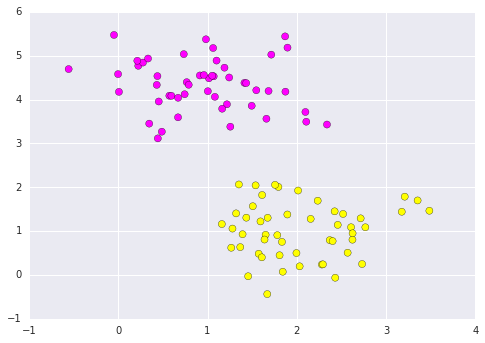

In [51]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

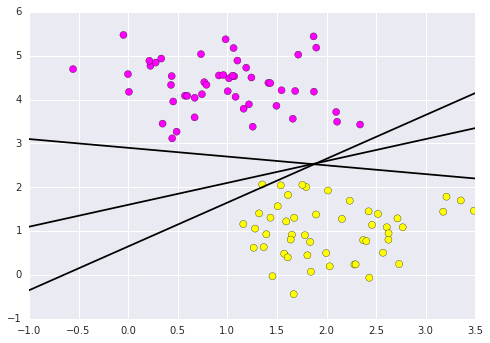

In [52]:
xfit = np.linspace(-1, 3.5)
# generates 50 equally spaced points between -1 and 3.5

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
# creates a scatterplot of the blob data generated above

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
# we create 3 equations of straight lines (y = mx + c) and 
# plot them using xfit and arbitrary values of m, c

plt.xlim(-1, 3.5);
# ensures that the plot ends at the extremes of the data

### Maximizing the Margin

Support vector machines not only draw linear classification boundaries, 
- but consider a **region about the line** of some given width.

This is the intuition of **support vector machines**, 

>Optimize a linear discriminant model in conjunction with a **margin** representing the perpendicular distance between the datasets.

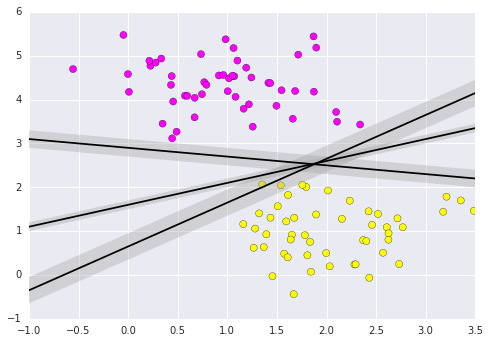

In [53]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
# plot the data created 

# in addition to the lines, we will shade areas around the lines (the 'd' parameter)
for m, b, d in [(1, 0.65, 0.3), (0.5, 1.6, 0.1), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

---
- A function to plot SVM decision boundaries

In [54]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
        
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

---
## `scikit` Syntax for SVMs

## LINEAR KERNELS

We make use of the `SVC` estimators (Support Vector Classfiers)

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

_**But what are support vectors?**_

- Notice that the dashed lines touch a couple of the points: these are known as the *support vectors* (giving the algorithm its name). 
- In scikit-learn, these are stored in the ``support_vectors_`` attribute of the classifier:

** Creating an interactive widget **

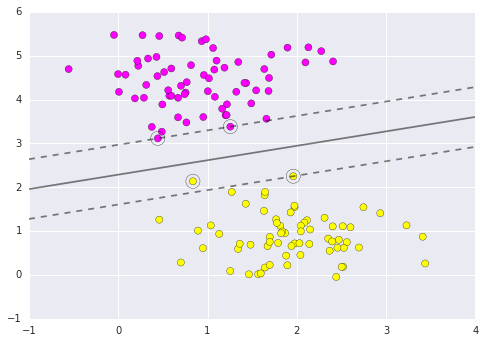

In [57]:
from IPython.html.widgets import interact

def plot_svm(N=10):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, N=[10, 200], kernel='linear');

> Notice the **unique thing about SVM** is that **only the support vectors matter**: that is, if you moved any of the other points without letting them cross the decision boundaries, they would have no effect on the classification results!


---

## NONLINEAR KERNELS

- Where SVM gets incredibly exciting is when it is used in conjunction with *kernels*.
- To motivate the need for kernels, let's look at some **data which is not linearly separable:**

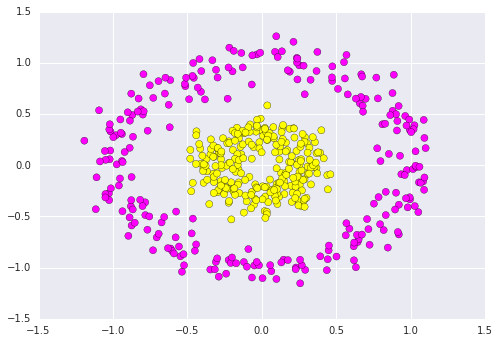

In [58]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(500, factor=.3, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

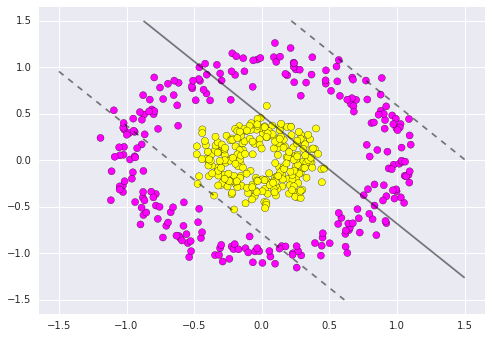

In [59]:
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

** NOTE **
- Clearly, no linear discrimination will ever separate these data.
- One way we can adjust this is to apply a **kernel**, which _is some functional transformation of the input data._
- For example, one simple model we could use is a **radial basis function**

In [60]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

If we plot this along with our data, we can see the effect of it:

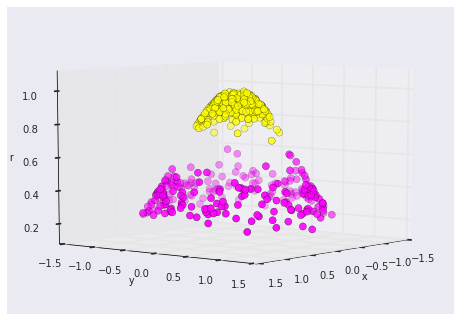

In [61]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

We can see that **with this additional dimension, the data becomes trivially linearly separable!**

This is a relatively simple kernel; SVM has a more sophisticated version of this kernel built-in to the process. This is accomplished by using ``kernel='rbf'``, short for *radial basis function*:

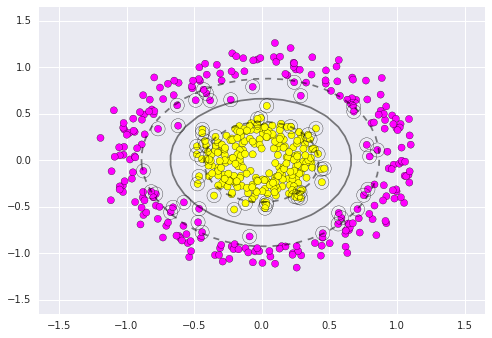

In [62]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

---
## Appendix

---
### NumPy Refresher

Some important concepts/features of NumPy frequently used in `scikit-learn`.

**1. Creating and reshaping vectors, matrices**

    # Create a row vector
    y = np.linspace(0, 12, 5)
    # equally spaced 5 values between 0, 12
    print(y)

    # Turn it into a column vector
    print(y[:, np.newaxis])

    # Generating a random array
    X = np.random.random((3, 5))  
    # creates a 3 x 5 array

    # getting the shape or reshaping an array
    print(X.shape)
    print(X.reshape(5, 3))

    # Transposing an array
    print(X.T) 
    
**2. Sparse Matrices**

If we are working with large matrices and most of the values are zeros, storing this becomes memory inefficient. 

    from scipy import sparse
    sparse_X = sparse.csr_matrix(X)
    
    # convert it back
    sparse_X.toarray()
    
 The matrix is now stored as a list of indices and values, that keep track of all the non-zero values of the matrix. The CSR representation (compressed-sparse-row) is computationally very efficient.
 
There are different kinds of representations for Sparse matrices like CSR, CSE (compressed sparse columns) and others. The best representation depends upon the application.

---
### Further Reading

- [Official Documentation](http://scikit-learn.org/stable/user_guide.html)
- Highest Voted scikit-learn Questions
    - [on Stack Overflow](http://stackoverflow.com/questions/tagged/scikit-learn?sort=votes&pageSize=15)
    - [on Cross Validated](http://stats.stackexchange.com/questions/tagged/scikit-learn?sort=votes&pageSize=15)
    - [on Reddit](https://www.reddit.com/domain/scikit-learn.org/top/?sort=top&t=all)
- PyCon and PyData Videos (_youtube links_) 
    - [ML with scikit-learn - Jake Van Der Plas](https://www.youtube.com/watch?v=L7R4HUQ-eQ0) 
    - [Advanced ML with Scikit - Olivier Grisel](https://www.youtube.com/watch?v=iFkRt3BCctg)
- GitHub Repos
    - [Scikit-learn Tutorial @PyCon 2015 - Jake Van Der Plas](https://github.com/jakevdp/sklearn_pycon2015)
    - [Parallel ML - Olivier Grisel](https://github.com/ogrisel/parallel_ml_tutorial)
- Blogs
    - [Data Science in Python by yHat](http://blog.yhathq.com/posts/data-science-in-python-tutorial.html)
    
- CRISP-DM
    - [Cross Industry Standard Process for Data Mining](https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining)
    
- Great visualization and explanation of Decision Trees
    - [Visual Explanation of Decision Trees](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
    
- DataTau
    - [The HackerNews of DataScience](www.datatau.com)
    
- A Few Important Things to Know about ML
    - [Paper as pdf](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)